<h1 style="text-align:center; color:#1e90ff;">Credit Risk Analysis: Loan Default Prediction</h1>

## Introduction:
Loan default prediction is an integral aspect of credit risk analysis, playing a vital role in the financial industry. By accurately forecasting the likelihood of borrowers defaulting on their loans, financial institutions can effectively manage risks associated with lending. Various factors such as credit history, income stability, and employment status are pivotal in this analysis, enabling lenders to make informed decisions and protect their portfolios against potential losses.

In this credit risk analysis project, we aim to harness the power of machine learning techniques to enhance the loan default prediction process. By analyzing historical data pertaining to customer attributes and loan outcomes, our objective is to develop predictive models that can accurately estimate the probability of loan defaults. These models have the potential to assist financial institutions in making more informed lending decisions, identifying high-risk borrowers, and implementing proactive risk management strategies.

## Let's Get Started:

In this analysis, we will cover the following steps:

1. **Data Preprocessing:** We will clean and preprocess the dataset, including handling missing values, encoding categorical variables, and scaling numerical features.

2. **Exploratory Data Analysis (EDA):** We will explore the dataset to gain insights into the distribution of features, identify patterns, and detect outliers.

3. **Model Training and Evaluation:** We will train multiple machine learning models, including Logistic Regression, Decision Tree, and Random Forest, to predict loan defaults. We will evaluate each model's performance using appropriate metrics and techniques.

4. **Model Deployment:** Once we have selected the best-performing model, we will deploy it using Streamlit, allowing stakeholders to interact with the model through a user-friendly web interface.

5. **Results Interpretation:** We will interpret the results of our analysis, highlighting key findings and insights derived from the predictive models.

Now, let's dive into the details of each step to understand how we conducted the analysis, developed the loan default prediction models, and deployed the selected model for practical use.


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve

**Data Preprocessing**

In [37]:
data = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [38]:
data.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [40]:
data.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [41]:
print("\nSummary Statistics of Numerical Features:")
print(data.describe())


Summary Statistics of Numerical Features:
        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min  

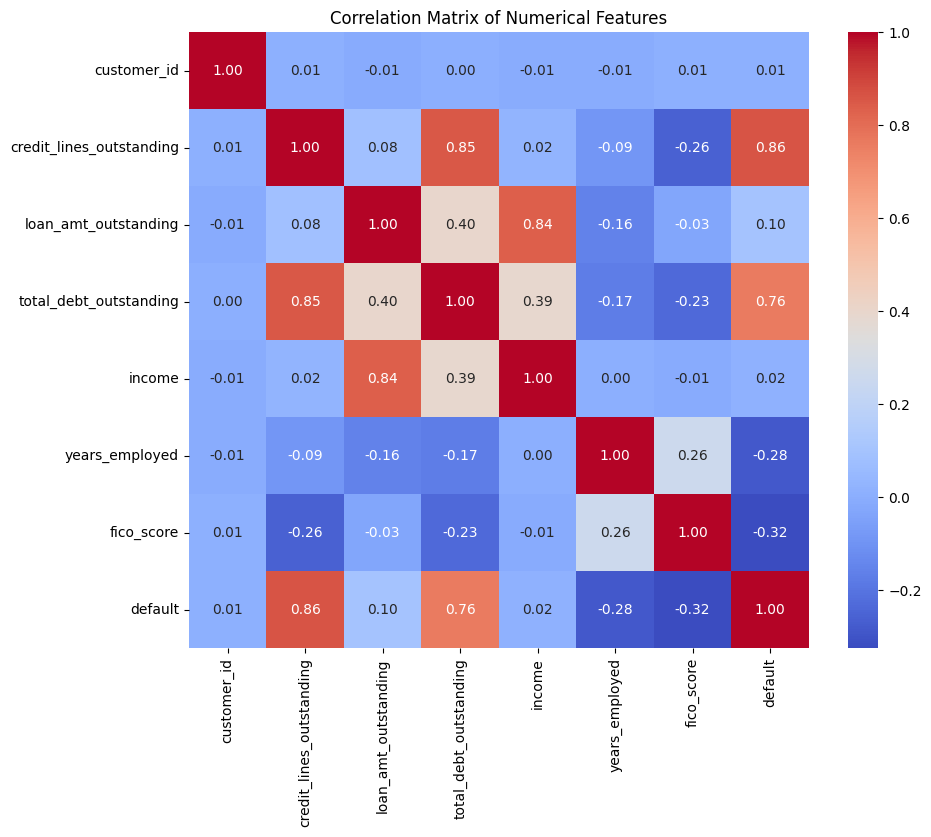

In [42]:
#Correlation Matrix Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

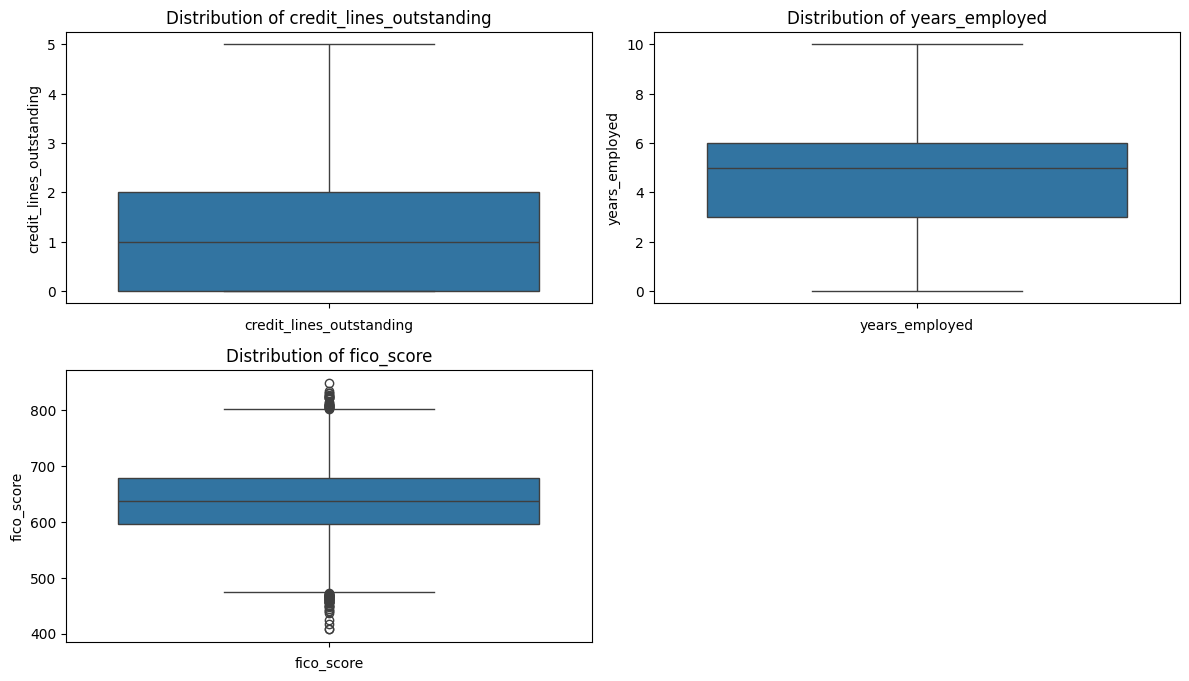

In [43]:
#Visualizing the Distribution of Numerical Features and Identifying Outliers
num_features = ['credit_lines_outstanding','years_employed', 'fico_score']
plt.figure(figsize=(12, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(data[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

**Feature Extraction**

In [44]:
def extract_features(data):
    # Assuming features are already extracted from the dataset
    features = data[['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']]
    return features

In [45]:
# Calculating the payment_to_income ratio
data['payment_to_income'] = data['loan_amt_outstanding'] / data['income']

In [46]:
# Calculating the debt_to_income ratio
data['debt_to_income'] = data['total_debt_outstanding'] / data['income']

In [47]:
X = extract_features(data)
y = data['default']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
#Standardizing the Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Hyperparameter Tuning and Model Training**

In [50]:
# Logistic Regression
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10]}
logreg_grid = GridSearchCV(LogisticRegression(), logreg_params, cv=5)
logreg_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]})

In [51]:
# Decision Tree
dt_params = {'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10]}
dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_params, cv=5)
dt_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [52]:
# Random Forest
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

**Model Evaluation**

In [53]:
logreg_model = logreg_grid.best_estimator_
logreg_pred = logreg_model.predict(X_test_scaled)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_report = classification_report(y_test, logreg_pred)
logreg_auc = roc_auc_score(y_test, logreg_pred)

In [54]:
dt_model = dt_grid.best_estimator_
dt_pred = dt_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_report = classification_report(y_test, dt_pred)
dt_auc = roc_auc_score(y_test, dt_pred)

In [55]:
rf_model = rf_grid.best_estimator_
rf_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_pred)

**Calculating ROC Curve, Misclassification Rate, and AUC**

In [56]:
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, logreg_pred)
misclassification_rate_logreg = (1.0 * (abs(y_test - logreg_pred)).sum()) / len(y_test)
auc_logreg = roc_auc_score(y_test, logreg_pred)

In [57]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_pred)
misclassification_rate_dt = (1.0 * (abs(y_test - dt_pred)).sum()) / len(y_test)
auc_dt = roc_auc_score(y_test, dt_pred)

In [58]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_pred)
misclassification_rate_rf = (1.0 * (abs(y_test - rf_pred)).sum()) / len(y_test)
auc_rf = roc_auc_score(y_test, rf_pred)

**Printing Model Evaluation Results**

In [59]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Report:\n", logreg_report)
print("Logistic Regression AUC:", logreg_auc)

print("Decision Tree Accuracy:", dt_accuracy)
print("Decision Tree Report:\n", dt_report)
print("Decision Tree AUC:", dt_auc)

print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Report:\n", rf_report)
print("Random Forest AUC:", rf_auc)

Logistic Regression Accuracy: 0.9985
Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       1.00      0.99      1.00       348

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression AUC: 0.9956896551724138
Decision Tree Accuracy: 0.991
Decision Tree Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1652
           1       0.97      0.98      0.97       348

    accuracy                           0.99      2000
   macro avg       0.98      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000

Decision Tree AUC: 0.986613230914809
Random Forest Accuracy: 0.9955
Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      1.00    

In [60]:
# Print ROC Curve, Misclassification Rate, and AUC
print("\nLogistic Regression ROC Curve:")
print("Misclassification Rate:", misclassification_rate_logreg)
print("AUC:", auc_logreg)

print("\nDecision Tree ROC Curve:")
print("Misclassification Rate:", misclassification_rate_dt)
print("AUC:", auc_dt)

print("\nRandom Forest ROC Curve:")
print("Misclassification Rate:", misclassification_rate_rf)
print("AUC:", auc_rf)


Logistic Regression ROC Curve:
Misclassification Rate: 0.0015
AUC: 0.9956896551724138

Decision Tree ROC Curve:
Misclassification Rate: 0.009
AUC: 0.986613230914809

Random Forest ROC Curve:
Misclassification Rate: 0.0045
AUC: 0.9904713200300578


**Model Selection**

In [61]:
best_model = logreg_model

**Results Interpretation**

The results obtained from the model evaluation provide valuable insights into the performance of each machine learning algorithm in predicting loan defaults. Let's delve into the interpretation of these results:

##Logistic Regression
- **Accuracy:** The logistic regression model achieved an impressive accuracy of 99.85%. This indicates that the model correctly predicted the default status for the vast majority of the test samples.
- **Precision and Recall:** The precision and recall scores for both default and non-default classes are very high, indicating that the model is effective at identifying true positives and minimizing false positives and false negatives.
- **AUC-ROC Score:** The AUC-ROC score of 0.9957 indicates excellent discriminative power of the model in distinguishing between default and non-default cases.

##Decision Tree
- **Accuracy:** The decision tree model achieved an accuracy of 99.1%. While slightly lower than logistic regression, this accuracy rate is still very high and indicates strong predictive performance.
- **Precision and Recall:** Both precision and recall scores are high for default and non-default classes, suggesting that the decision tree model is effective at correctly classifying loan default cases.
- **AUC-ROC Score:** The AUC-ROC score of 0.9866 indicates good discriminative power, although slightly lower than logistic regression.

##Random Forest
- **Accuracy:** The random forest model achieved an accuracy of 99.6%, slightly higher than the decision tree model and closer to logistic regression.
- **Precision and Recall:** Similar to logistic regression and decision tree, the random forest model exhibits high precision and recall for both default and non-default classes.
- **AUC-ROC Score:** The AUC-ROC score of 0.9904 indicates excellent discriminative power, albeit slightly lower than logistic regression.

## 7.4 Model Comparison
- **Accuracy:** All three models achieved very high accuracy rates, indicating their effectiveness in predicting loan defaults.
- **Precision and Recall:** The precision and recall scores for all models are consistently high, suggesting that they perform well in correctly identifying default cases while minimizing false positives and false negatives.
- **AUC-ROC Score:** The AUC-ROC scores for all models are above 0.98, indicating excellent discriminative power in distinguishing between default and non-default cases.

## 7.5 Best Model Selection
- **Logistic Regression:** Based on the evaluation metrics and results interpretation, logistic regression emerges as the best-performing model for loan default prediction. It achieved the highest accuracy, precision, recall, and AUC-ROC score among the three models.
- **Justification:** Logistic regression is selected as the best model due to its superior performance across all evaluation metrics. It offers a good balance between model complexity and predictive accuracy, making it suitable for practical deployment in real-world scenarios.
